## Traffic Sign Classification

In [1]:
# Set Parameters

# Batch Size for all Datasets
BATCH_SIZE = 128

# Epochs for Training
EPOCHS = 10


In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.image import imread
from keras.models import Sequential
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense


#### Get Dataset form Kaggle

In [3]:
# Download Dataset
!mkdir dataset
%cd dataset
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
clear_output()


In [4]:
# Unzip Dataset
!tar -xf gtsrb-german-traffic-sign.zip


In [5]:
# Delete Unwanted Files
!del gtsrb-german-traffic-sign.zip
!rmdir /s/q Meta
!del Meta.csv
!del Test\GT-final_test.csv
%cd ..
clear_output()


#### Vizualizing Some Data

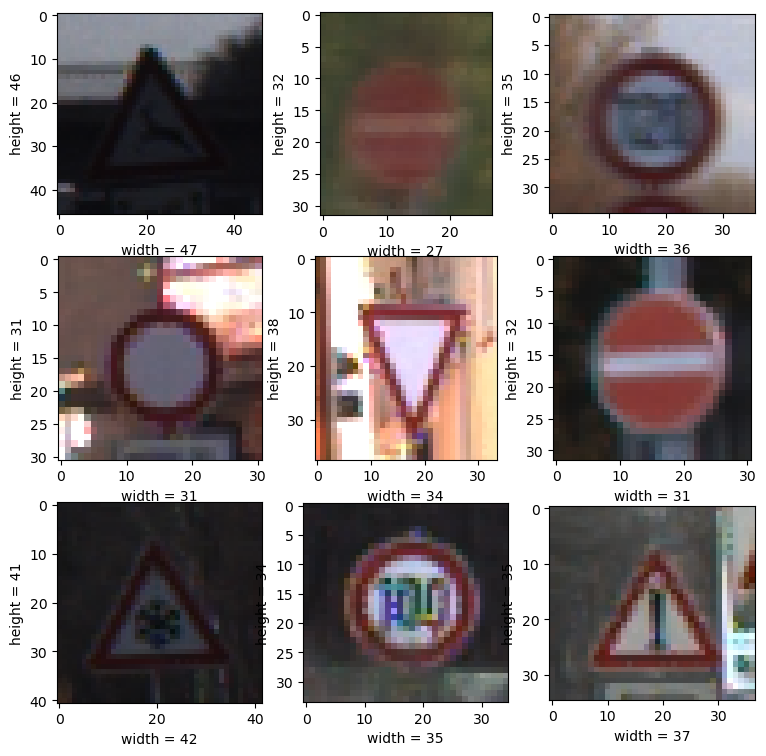

In [6]:
files = os.listdir('dataset/Test')
fig, ax = plt.subplots(3, 3, figsize=(9, 9))
for i in range(3):
    for j in range(3):
        img = imread(f'dataset/Test/{random.choice(files)}')
        ax[i][j].imshow(img)
        ax[i][j].set_xlabel(f'width = {img.shape[1]}')
        ax[i][j].set_ylabel(f'height = {img.shape[0]}')


Sizes of Images are Different.

#### Loading Images and Making Sizes of Images Same

In [7]:
# Finding Average Dimensions
avg_dim = [0, 0]
num_files = 0
for i in range(43):
    path = f'dataset/Train/{i}'
    files = os.listdir(path)
    num_files += len(files)
    for file in files:
        img = Image.open(f'{path}/{file}')
        avg_dim[0] += img.size[0]
        avg_dim[1] += img.size[1]
avg_dim[0] = round(avg_dim[0]/num_files)
avg_dim[1] = round(avg_dim[1]/num_files)

print(f'Average size of Images = ({avg_dim[0]}, {avg_dim[1]})')


Average size of Images = (51, 50)


In [8]:
# Laoding and Resizing images to (50, 50)
X_data = []
Y_data = []
for i in range(43):
    path = f'dataset/Train/{i}'
    files = os.listdir(path)
    Y_data += len(files) * [i]
    for file in files:
        img = Image.open(f'{path}/{file}').resize((50, 50))
        img = np.array(img)
        X_data.append(img)
X_data = np.array(X_data)
Y_data = np.array(Y_data)


#### Setting up Data

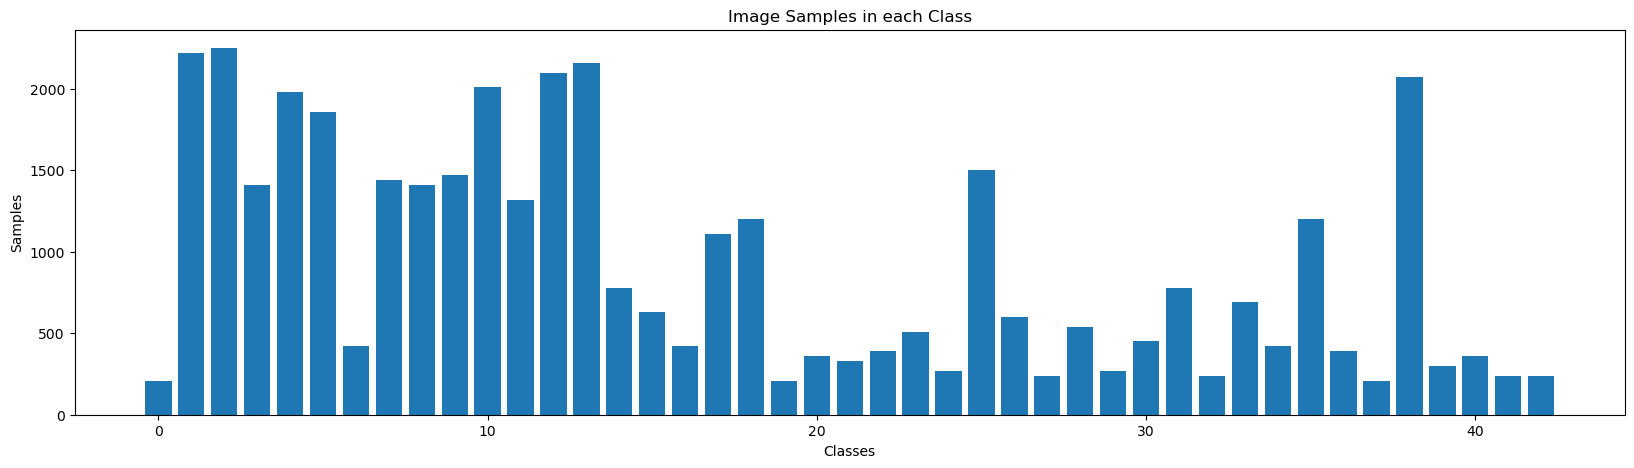

In [9]:
# Vizualizing Counts of Classes
data = np.unique(Y_data, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xlabel('Classes')
ax.set_ylabel('Samples')
ax.set_title('Image Samples in each Class')
_ = ax.bar(data[0], data[1])


In [10]:
# Scaling the images
X_data = X_data/255


In [11]:
# Split the Data
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2)


#### Modelling

In [12]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(50, 50, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, Y_val), verbose=2)


Epoch 1/10
246/246 - 6s - loss: 2.4633 - accuracy: 0.3280 - val_loss: 1.1088 - val_accuracy: 0.7446 - 6s/epoch - 23ms/step
Epoch 2/10
246/246 - 3s - loss: 1.1432 - accuracy: 0.6444 - val_loss: 0.4658 - val_accuracy: 0.8998 - 3s/epoch - 13ms/step
Epoch 3/10
246/246 - 3s - loss: 0.7694 - accuracy: 0.7533 - val_loss: 0.2831 - val_accuracy: 0.9404 - 3s/epoch - 13ms/step
Epoch 4/10
246/246 - 3s - loss: 0.6227 - accuracy: 0.7985 - val_loss: 0.2067 - val_accuracy: 0.9628 - 3s/epoch - 13ms/step
Epoch 5/10
246/246 - 3s - loss: 0.5293 - accuracy: 0.8285 - val_loss: 0.1718 - val_accuracy: 0.9728 - 3s/epoch - 13ms/step
Epoch 6/10
246/246 - 4s - loss: 0.4697 - accuracy: 0.8465 - val_loss: 0.1288 - val_accuracy: 0.9792 - 4s/epoch - 15ms/step
Epoch 7/10
246/246 - 4s - loss: 0.4278 - accuracy: 0.8601 - val_loss: 0.1212 - val_accuracy: 0.9799 - 4s/epoch - 15ms/step
Epoch 8/10
246/246 - 3s - loss: 0.3871 - accuracy: 0.8721 - val_loss: 0.0914 - val_accuracy: 0.9838 - 3s/epoch - 13ms/step
Epoch 9/10
246/2

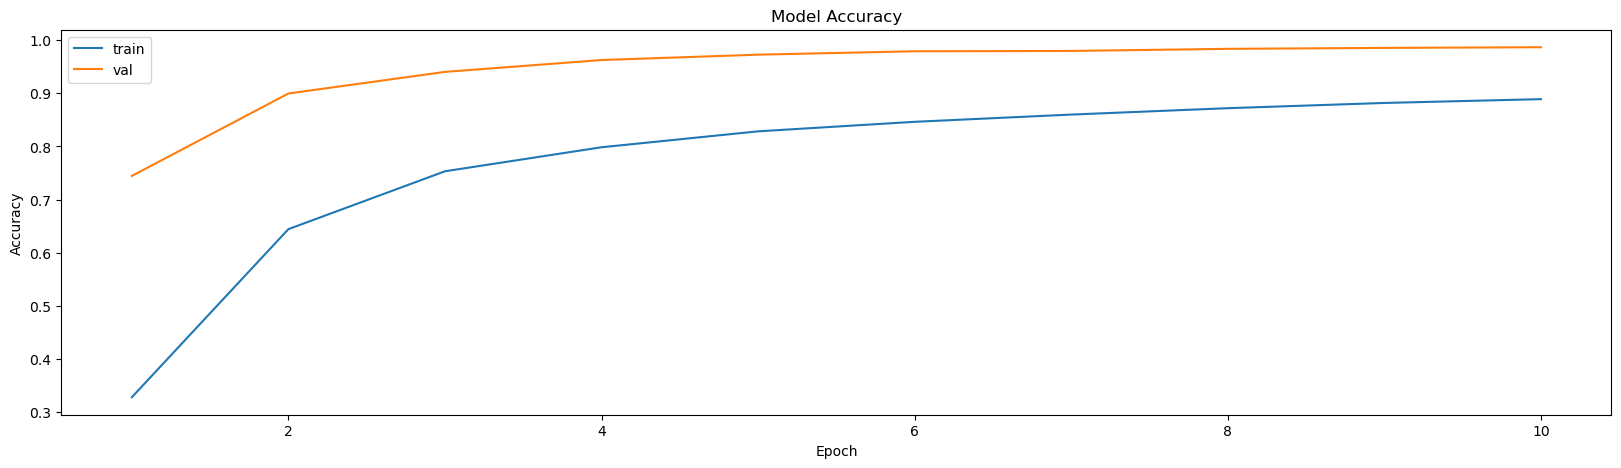

In [14]:
# Plot the Training History
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.plot(range(1, len(history.history['accuracy'])+1), history.history['accuracy'], label='train')
ax.plot(range(1, len(history.history['val_accuracy'])+1), history.history['val_accuracy'], label='val')
_ = ax.legend()


#### Loading Test Images

In [15]:
# Loading Test Images
path = 'dataset/Test'
files = os.listdir(path)
X_test = []
for file in files:
    img = Image.open(f'{path}/{file}').resize((50, 50))
    img = np.array(img)
    X_test.append(img)
X_test = np.array(X_test)/255


In [16]:
# Loading Test Labels
Y_test = pd.read_csv('dataset/Test.csv')['ClassId'].values


#### Model Evaluation

In [17]:
# Model Accuracy on Test Data
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: %1.0f%%' % round((score[1]*100), 2))


395/395 [==============================] - 1s 2ms/step - loss: 0.1757 - accuracy: 0.9517
Accuracy over the test set: 95%
